In [108]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

In [32]:
raw_data = pd.read_csv('wine_modified.csv')

In [33]:
# Question 1
raw_data = raw_data[raw_data.isnull().sum(axis=1)<8]
raw_data = raw_data[raw_data['class'].notnull()]
raw_data.shape[0]

154

In [34]:
# Question 2
#-1: One part wrong
#-2: Both parts wrong
raw_data.isnull().sum(axis=0)

class                    0
Alcohol                  0
Malic acid               0
Ash                     95
Alcalinity of ash        0
Magnesium                9
Total phenols            0
Flavanoids              35
Nonflavanoid phenols     0
Proanthocyanins          0
Color intensity          0
Hue                      0
OD280/OD315              0
Proline                  0
dtype: int64

In [35]:
del raw_data['Ash']

In [36]:
avg = raw_data['Magnesium'].mean()
raw_data['Magnesium'] = raw_data['Magnesium'].fillna(avg)

In [37]:
avg = raw_data['Flavanoids'].mean()
raw_data['Flavanoids'] = raw_data['Flavanoids'].fillna(avg)

In [38]:
raw_data.std(axis=0)

class                     0.766522
Alcohol                   3.804067
Malic acid                1.116005
Alcalinity of ash         3.456794
Magnesium                14.440377
Total phenols             0.617237
Flavanoids                0.873573
Nonflavanoid phenols      0.127083
Proanthocyanins           0.587671
Color intensity           2.325204
Hue                       0.229412
OD280/OD315               0.723261
Proline                 303.033368
dtype: float64

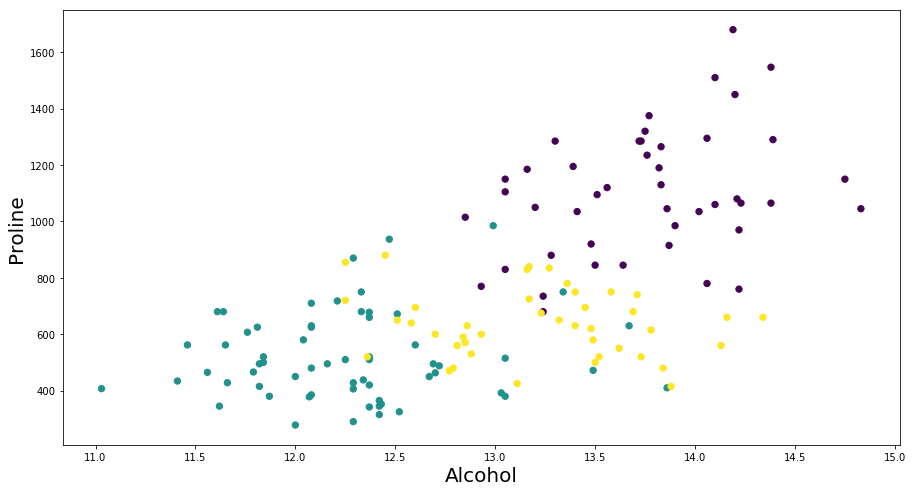

In [44]:
#Question 3
plt.figure(figsize=(15,8))
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Proline', fontsize=20)
plt.scatter(raw_data['Alcohol'], raw_data['Proline'], s=40, c=raw_data['class'])

In [40]:
# Outliers/Incorrect values Alcohol
raw_data = raw_data[raw_data['Alcohol'] > 0]

In [42]:
# Outliers/Incorrect values Proline
mean = raw_data['Proline'].mean()
std = raw_data['Proline'].std()
raw_data = raw_data[raw_data['Proline'].between(mean-4*std,mean+4*std)]

In [43]:
raw_data

,class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.0,14.23,1.71,15.6,127.000000,2.80,3.060000,0.28,2.29,5.640000,1.04,3.92,1065.0
1,1.0,13.20,1.78,11.2,100.000000,2.65,2.760000,0.26,1.28,4.380000,1.05,3.40,1050.0
2,1.0,13.16,2.36,18.6,101.000000,2.80,3.240000,0.30,2.81,5.680000,1.03,3.17,1185.0
4,1.0,13.24,2.59,21.0,118.000000,2.80,2.690000,0.39,1.82,4.320000,1.04,2.93,735.0
5,1.0,14.20,1.76,15.2,112.000000,3.27,1.937983,0.34,1.97,6.750000,1.05,2.85,1450.0
6,1.0,14.39,1.87,14.6,96.000000,2.50,2.520000,0.30,1.98,5.250000,1.02,3.58,1290.0
7,1.0,14.06,2.15,17.6,121.000000,2.60,2.510000,0.31,1.25,5.050000,1.06,3.58,1295.0
8,1.0,14.83,1.64,14.0,97.000000,2.80,2.980000,0.29,1.98,5.200000,1.08,2.85,1045.0
9,1.0,13.86,1.35,16.0,98.000000,2.98,1.937983,0.22,1.85,7.220000,1.01,3.55,1045.0
10,1.0,14.10,2.16,18.0,99.496552,2.95,1.937983,0.22,2.38,5.750000,1.25,3.17,1510.0


# Decision Tree

In [411]:
train_data = pd.read_csv('wine_train_data.csv')
train_labels = pd.read_csv('wine_train_labels.csv')
val_data =  pd.read_csv('wine_val_data.csv')
val_labels = pd.read_csv('wine_val_labels.csv')
test_data = pd.read_csv('wine_test_data.csv')
test_labels = pd.read_csv('wine_test_labels.csv')

In [412]:
total_data = pd.concat([train_data, val_data], ignore_index=True)
total_labels = pd.concat([train_labels, val_labels], ignore_index=True)

In [413]:
#Question 4
for crit in ['gini', 'entropy']:
    model = DecisionTreeClassifier(criterion=crit)
    model.fit(train_data, train_labels)
    pred = model.predict(val_data)
    print ('Validation accuracy for criterion ' + crit + ' = ' + str(accuracy_score(val_labels, pred)))

Validation accuracy for criterion gini = 0.948717948718
Validation accuracy for criterion entropy = 0.974358974359


In [414]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(total_data, total_labels)
pred = model.predict(test_data)
print ('Test accuracy for criterion ' + 'entropy' + ' = ' + str(accuracy_score(test_labels, pred)))

Test accuracy for criterion entropy = 0.820512820513


In [423]:
# Question 5
#-1: wrong answer, missing test accuracy
#-2: wrong method
for sample_split_size in [2,5,10,20]:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_split=sample_split_size)
    model.fit(train_data, train_labels)
    pred = model.predict(val_data)
    print ('Validation accuracy for min_sample_split ' + str(sample_split_size) + ' = ' + str(accuracy_score(val_labels, pred)))

Validation accuracy for min_sample_split 2 = 0.948717948718
Validation accuracy for min_sample_split 5 = 0.974358974359
Validation accuracy for min_sample_split 10 = 0.923076923077
Validation accuracy for min_sample_split 20 = 0.948717948718


In [424]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
model.fit(total_data, total_labels)
pred = model.predict(test_data)
print ('Test accuracy for criterion ' + 'entropy' + ' = ' + str(accuracy_score(test_labels, pred)))

Test accuracy for criterion entropy = 0.820512820513


In [425]:
# Question 6
#-1: wrong answer
#-2: wrong method
result=[]
for data_size in [20,40,60,80, 100]:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
    model.fit(train_data[:data_size], train_labels[:data_size])
    pred = model.predict(val_data)
    result.append(accuracy_score(val_labels, pred))
    print ('Validation accuracy for data size ' + str(data_size) + ' = ' + str(accuracy_score(val_labels, pred)))

Validation accuracy for data size 20 = 0.666666666667
Validation accuracy for data size 40 = 0.846153846154
Validation accuracy for data size 60 = 0.871794871795
Validation accuracy for data size 80 = 0.923076923077
Validation accuracy for data size 100 = 0.948717948718


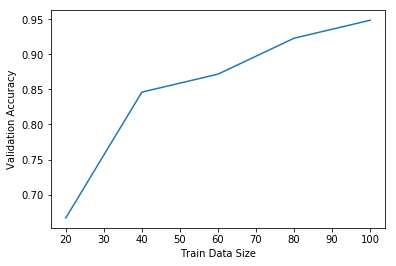

In [426]:
plt.ylabel('Validation Accuracy')
plt.xlabel('Train Data Size')
plt.plot([20,40,60,80, 100], result)

# Nearest Neighbor

In [427]:
# Normalize Data
mean = total_data.mean(axis=0)
std = total_data.std(axis=0)
total_data = (total_data - mean)/std
train_data = (train_data - mean)/std
val_data = (val_data - mean)/std
test_data = (test_data-mean)/std

In [461]:
#Question 7
model = KNeighborsClassifier(n_neighbors=3)
model.fit(total_data, total_labels)
pred = model.predict(test_data)
print('Test Accuracy = ' + str(accuracy_score(test_labels, pred)))

Test Accuracy = 0.871794871795


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [462]:
# Question 8
dist_set = ['manhattan','euclidean', 'chebyshev']
for dist in dist_set:
    model = KNeighborsClassifier(n_neighbors=3, metric=dist)
    model.fit(train_data, train_labels)
    pred = model.predict(val_data)
    print('Validation Accuracy for ' + dist + ' = ' + str(accuracy_score(val_labels, pred)))

Validation Accuracy for manhattan = 0.948717948718
Validation Accuracy for euclidean = 0.923076923077
Validation Accuracy for chebyshev = 0.923076923077


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [463]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(total_data, total_labels)
pred = model.predict(test_data)
print('Test Accuracy = ' + str(accuracy_score(test_labels, pred)))

Test Accuracy = 0.974358974359


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


[0.94871794871794868, 0.92307692307692313, 0.94871794871794868, 0.97435897435897434, 0.94871794871794868]


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


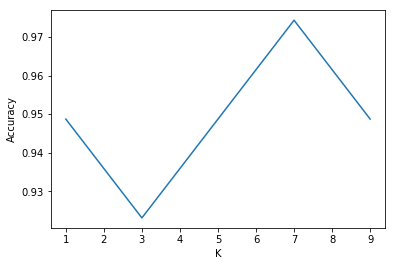

In [465]:
#Question 9
#-1: wrong answer, missing test accuracy
#-2: wrong method
result = []
k_set = [1,3,5,7,9]
for k in k_set:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data, train_labels)
    pred = model.predict(val_data)
    result.append(accuracy_score(val_labels, pred))
print(result)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.plot(k_set, result)

In [466]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(total_data, total_labels)
pred = model.predict(test_data)
print('Test Accuracy = ' + str(accuracy_score(test_labels, pred)))

Test Accuracy = 0.923076923077


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


[0.94871794871794868, 1.0, 1.0, 1.0, 0.92307692307692313]


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


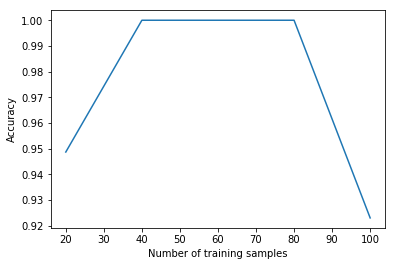

In [467]:
#Question 10
#-1: wrong answer
#-2: wrong method
model = KNeighborsClassifier(n_neighbors=3)
result = []
train_size = [20,40,60,80,100]
for s in train_size:
    model.fit(train_data[:s], train_labels[:s])
    pred = model.predict(val_data)
    result.append(accuracy_score(val_labels, pred))
print(result)
plt.ylabel('Accuracy')
plt.xlabel('Number of training samples')
plt.plot(train_size, result)